# HAI Dataset Exploration & Baseline Analysis

**Project:** AI for Automated Intrusion Detection in ICS Networks  
**Dataset:** HAI (Hardware-in-the-loop Augmented ICS Security Dataset)  
**Date:** November 6, 2025  
**Phase:** 3 - Data Exploration & Baseline Testing

---

## Objectives
1. Load and understand HAI dataset structure
2. Explore sensor data and attack patterns
3. Visualize normal vs attack behavior
4. Test baseline detection methods
5. Document findings for next phases

In [1]:
# Import libraries
import sys
from pathlib import Path

# Add project root to path
project_root = Path.cwd().parent
sys.path.insert(0, str(project_root))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Project modules
from src.data.hai_loader import HAIDataLoader
from src.models.baseline_detector import BaselineDetector

# Visualization settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Display settings
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


## 1. Load HAI Dataset

In [2]:
# Initialize HAI data loader
loader = HAIDataLoader('21.03')

print("📊 Loading HAI dataset...\n")

# Load training data (normal behavior)
train_df = loader.load_train_data(train_num=1, nrows=50000)

# Load test data (contains attacks)
test_df = loader.load_test_data(test_num=1, nrows=20000)

print(f"\n✅ Data loaded successfully!")
print(f"Training samples: {len(train_df):,}")
print(f"Test samples: {len(test_df):,}")

📊 Loading HAI dataset...

Loading HAI training data from: c:\Users\PC-ASUS\Desktop\ICS NETWORKS\data\raw\hai\hai-21.03\train1.csv.gz
✅ Loaded 50000 samples with 84 columns
Loading HAI test data from: c:\Users\PC-ASUS\Desktop\ICS NETWORKS\data\raw\hai\hai-21.03\test1.csv.gz
✅ Loaded 50000 samples with 84 columns
Loading HAI test data from: c:\Users\PC-ASUS\Desktop\ICS NETWORKS\data\raw\hai\hai-21.03\test1.csv.gz
✅ Loaded 20000 samples with 84 columns

✅ Data loaded successfully!
Training samples: 50,000
Test samples: 20,000
✅ Loaded 20000 samples with 84 columns

✅ Data loaded successfully!
Training samples: 50,000
Test samples: 20,000


## 2. Dataset Overview

In [3]:
# Get dataset information
train_info = loader.get_dataset_info(train_df)
test_info = loader.get_dataset_info(test_df)

# Print summaries
loader.print_dataset_summary(train_info)
loader.print_dataset_summary(test_info)


HAI DATASET SUMMARY (Version 21.03)
Total Samples:       50,000
Total Features:      83
Missing Values:      0
Memory Usage:        34.90 MB

Attack Information:
  Normal Samples:    0
  Attack Samples:    50,000
  Attack Ratio:      100.00%
  Attack Types:      1

Attack Types Found:
    1. 0

Process Distribution:
  P1: 38 sensors
  P2: 22 sensors
  P3: 7 sensors
  P4: 12 sensors


HAI DATASET SUMMARY (Version 21.03)
Total Samples:       20,000
Total Features:      83
Missing Values:      0
Memory Usage:        13.96 MB

Attack Information:
  Normal Samples:    0
  Attack Samples:    20,000
  Attack Ratio:      100.00%
  Attack Types:      2

Attack Types Found:
    1. 0
    2. 1

Process Distribution:
  P1: 38 sensors
  P2: 22 sensors
  P3: 7 sensors
  P4: 12 sensors



In [4]:
# Examine first few rows
print("First 5 rows of training data:")
train_df.head()

First 5 rows of training data:


,time,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,P1_FCV01Z,P1_FCV02D,P1_FCV02Z,P1_FCV03D,P1_FCV03Z,P1_FT01,P1_FT01Z,P1_FT02,P1_FT02Z,P1_FT03,P1_FT03Z,P1_LCV01D,P1_LCV01Z,P1_LIT01,P1_PCV01D,...,P2_VYT02,P2_VYT03,P3_FIT01,P3_LCP01D,P3_LCV01D,P3_LH,P3_LIT01,P3_LL,P3_PIT01,P4_HT_FD,P4_HT_LD,P4_HT_PO,P4_HT_PS,P4_LD,P4_ST_FD,P4_ST_GOV,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,attack,attack_P1,attack_P2,attack_P3
0,2020-07-11 00:00:00,0.10121,1.29784,397.63785,1001.99799,33.6555,100.0,2847.02539,37.14706,100.0,100.0,0.0,-1.87531,51.58201,52.80456,166.74039,808.29620,1973.19031,2847.02539,246.43968,1000.44769,8.79882,8.46252,395.19528,39.09198,...,4.1758,6.0951,4795.0,10832,608,70,15454.0,20,815.0,-0.00072,0.06511,4.01474,0,301.01636,-0.00297,16495.0,301.35992,305.03113,0,10052.0,27610.0,0,0,0,0
1,2020-07-11 00:00:01,0.10121,1.29692,397.63785,1001.99799,33.6555,100.0,2839.58520,37.14477,100.0,100.0,0.0,-1.88294,51.60648,52.78931,168.64778,819.16809,1975.47900,2839.58520,246.43968,1000.01270,8.78811,8.47015,395.14420,39.05680,...,3.9259,5.9262,4835.0,10984,528,70,15461.0,20,883.0,-0.00051,0.04340,3.74347,0,297.43567,0.00072,16402.0,297.43567,304.27161,0,10052.0,27610.0,0,0,0,0
2,2020-07-11 00:00:02,0.10121,1.29631,397.63785,1001.99799,33.6555,100.0,2833.26807,37.14325,100.0,100.0,0.0,-1.88294,51.57790,52.79694,168.83849,823.51697,1972.42725,2833.26807,246.05821,1000.88245,8.81787,8.47015,395.14420,38.97124,...,3.6489,5.8101,4961.0,11120,464,70,15462.0,20,956.0,-0.00043,0.04340,3.43603,0,298.84619,-0.00145,16379.0,298.66534,303.89179,0,10050.0,27617.0,0,0,0,0
3,2020-07-11 00:00:03,0.10121,1.28685,397.63785,1001.99799,33.6555,100.0,2834.95264,37.11959,100.0,100.0,0.0,-1.88294,51.58236,52.79694,170.55510,823.95172,1983.10828,2834.95264,246.63045,1000.88245,8.87493,8.46252,395.19528,38.94103,...,3.3040,5.7509,5022.0,11256,416,70,15466.0,20,992.0,-0.00072,0.02170,3.12860,0,297.74310,-0.00318,16422.0,298.06860,303.67474,0,10052.0,27614.0,0,0,0,0
4,2020-07-11 00:00:04,0.10121,1.28807,397.63785,1001.99799,33.6555,100.0,2832.70654,37.12265,100.0,100.0,0.0,-1.88294,51.62335,52.79694,171.31805,827.86560,1986.16016,2832.70654,246.24898,1000.01270,8.83838,8.47015,395.34866,38.90300,...,3.1881,5.8547,5088.0,11384,368,70,15461.0,20,1074.0,-0.00051,0.02170,2.87546,0,297.01965,0.00015,16355.0,296.53137,303.22266,0,10052.0,27621.0,0,0,0,0


In [5]:
# Check data types
print("Data types:")
print(train_df.dtypes.value_counts())

print("\nColumn names:")
print(train_df.columns.tolist())

Data types:
float64    54
int64      29
object      1
Name: count, dtype: int64

Column names:
['time', 'P1_B2004', 'P1_B2016', 'P1_B3004', 'P1_B3005', 'P1_B4002', 'P1_B4005', 'P1_B400B', 'P1_B4022', 'P1_FCV01D', 'P1_FCV01Z', 'P1_FCV02D', 'P1_FCV02Z', 'P1_FCV03D', 'P1_FCV03Z', 'P1_FT01', 'P1_FT01Z', 'P1_FT02', 'P1_FT02Z', 'P1_FT03', 'P1_FT03Z', 'P1_LCV01D', 'P1_LCV01Z', 'P1_LIT01', 'P1_PCV01D', 'P1_PCV01Z', 'P1_PCV02D', 'P1_PCV02Z', 'P1_PIT01', 'P1_PIT02', 'P1_PP01AD', 'P1_PP01AR', 'P1_PP01BD', 'P1_PP01BR', 'P1_PP02D', 'P1_PP02R', 'P1_STSP', 'P1_TIT01', 'P1_TIT02', 'P2_24Vdc', 'P2_ASD', 'P2_AutoGO', 'P2_CO_rpm', 'P2_Emerg', 'P2_HILout', 'P2_MSD', 'P2_ManualGO', 'P2_OnOff', 'P2_RTR', 'P2_SIT01', 'P2_SIT02', 'P2_TripEx', 'P2_VT01', 'P2_VTR01', 'P2_VTR02', 'P2_VTR03', 'P2_VTR04', 'P2_VXT02', 'P2_VXT03', 'P2_VYT02', 'P2_VYT03', 'P3_FIT01', 'P3_LCP01D', 'P3_LCV01D', 'P3_LH', 'P3_LIT01', 'P3_LL', 'P3_PIT01', 'P4_HT_FD', 'P4_HT_LD', 'P4_HT_PO', 'P4_HT_PS', 'P4_LD', 'P4_ST_FD', 'P4_ST_GOV', 'P

In [6]:
# Basic statistics
sensor_cols = loader.get_sensor_columns(train_df)
print(f"Number of sensor features: {len(sensor_cols)}\n")

# Statistical summary of first 10 sensors
train_df[sensor_cols[:10]].describe()

Number of sensor features: 83



,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.086491,1.376161,396.186160,1037.372384,32.564873,65.981908,1925.039157,36.289081,61.368573
std,0.024492,0.129493,10.162648,70.856977,0.757821,41.800653,1176.644555,0.822112,43.119220
min,0.030510,0.947290,378.359130,894.718690,32.000000,0.000000,25.025980,34.791950,0.000000
25%,0.060370,1.304688,393.162260,1001.997990,32.000000,18.346760,544.413450,35.676960,15.014207
50%,0.099130,1.379100,396.719450,1012.931820,32.000000,100.000000,2827.231440,35.934450,100.000000
75%,0.101210,1.448200,397.637850,1114.742060,33.655500,100.000000,2836.356440,37.189400,100.000000
max,0.101210,2.010330,416.515350,1115.119750,33.655500,100.000000,2857.545650,38.392180,100.000000


## 3. Attack Analysis

Attack Distribution:
attack
0    19460
1      540
Name: count, dtype: int64


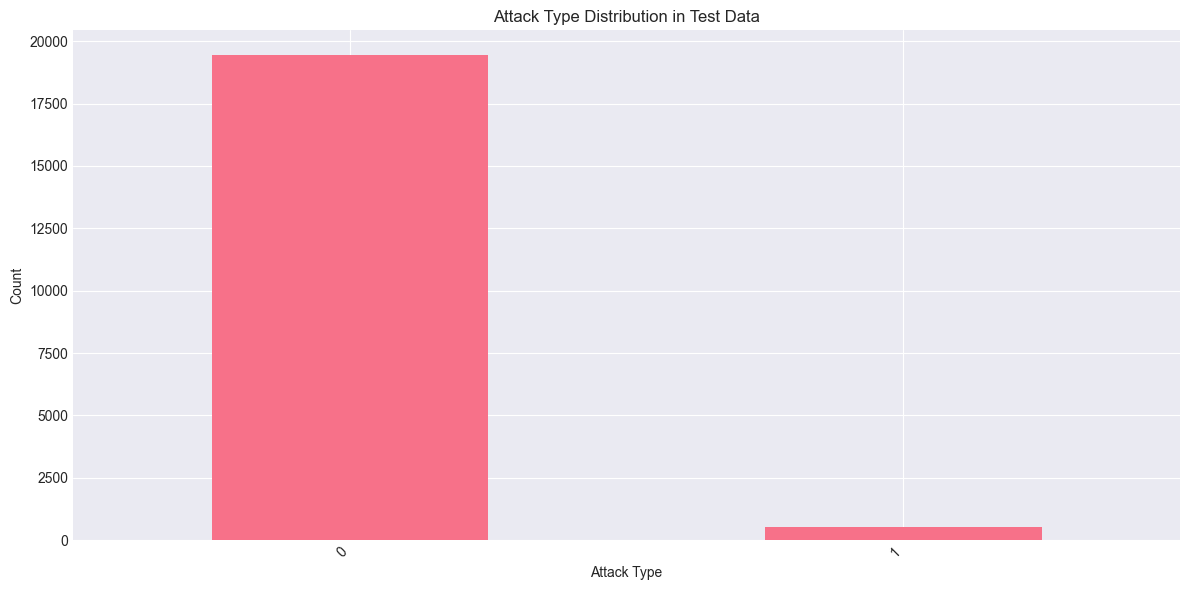


📊 Attack samples: 2.70% of test data


In [7]:
# Analyze attack distribution
if 'attack' in test_df.columns:
    attack_counts = test_df['attack'].value_counts()
    
    print("Attack Distribution:")
    print(attack_counts)
    
    # Visualize
    plt.figure(figsize=(12, 6))
    attack_counts.plot(kind='bar')
    plt.title('Attack Type Distribution in Test Data')
    plt.xlabel('Attack Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # Attack ratio
    attack_ratio = (test_df['attack'] != 0).mean() * 100
    print(f"\n📊 Attack samples: {attack_ratio:.2f}% of test data")

## 4. Sensor Data Visualization

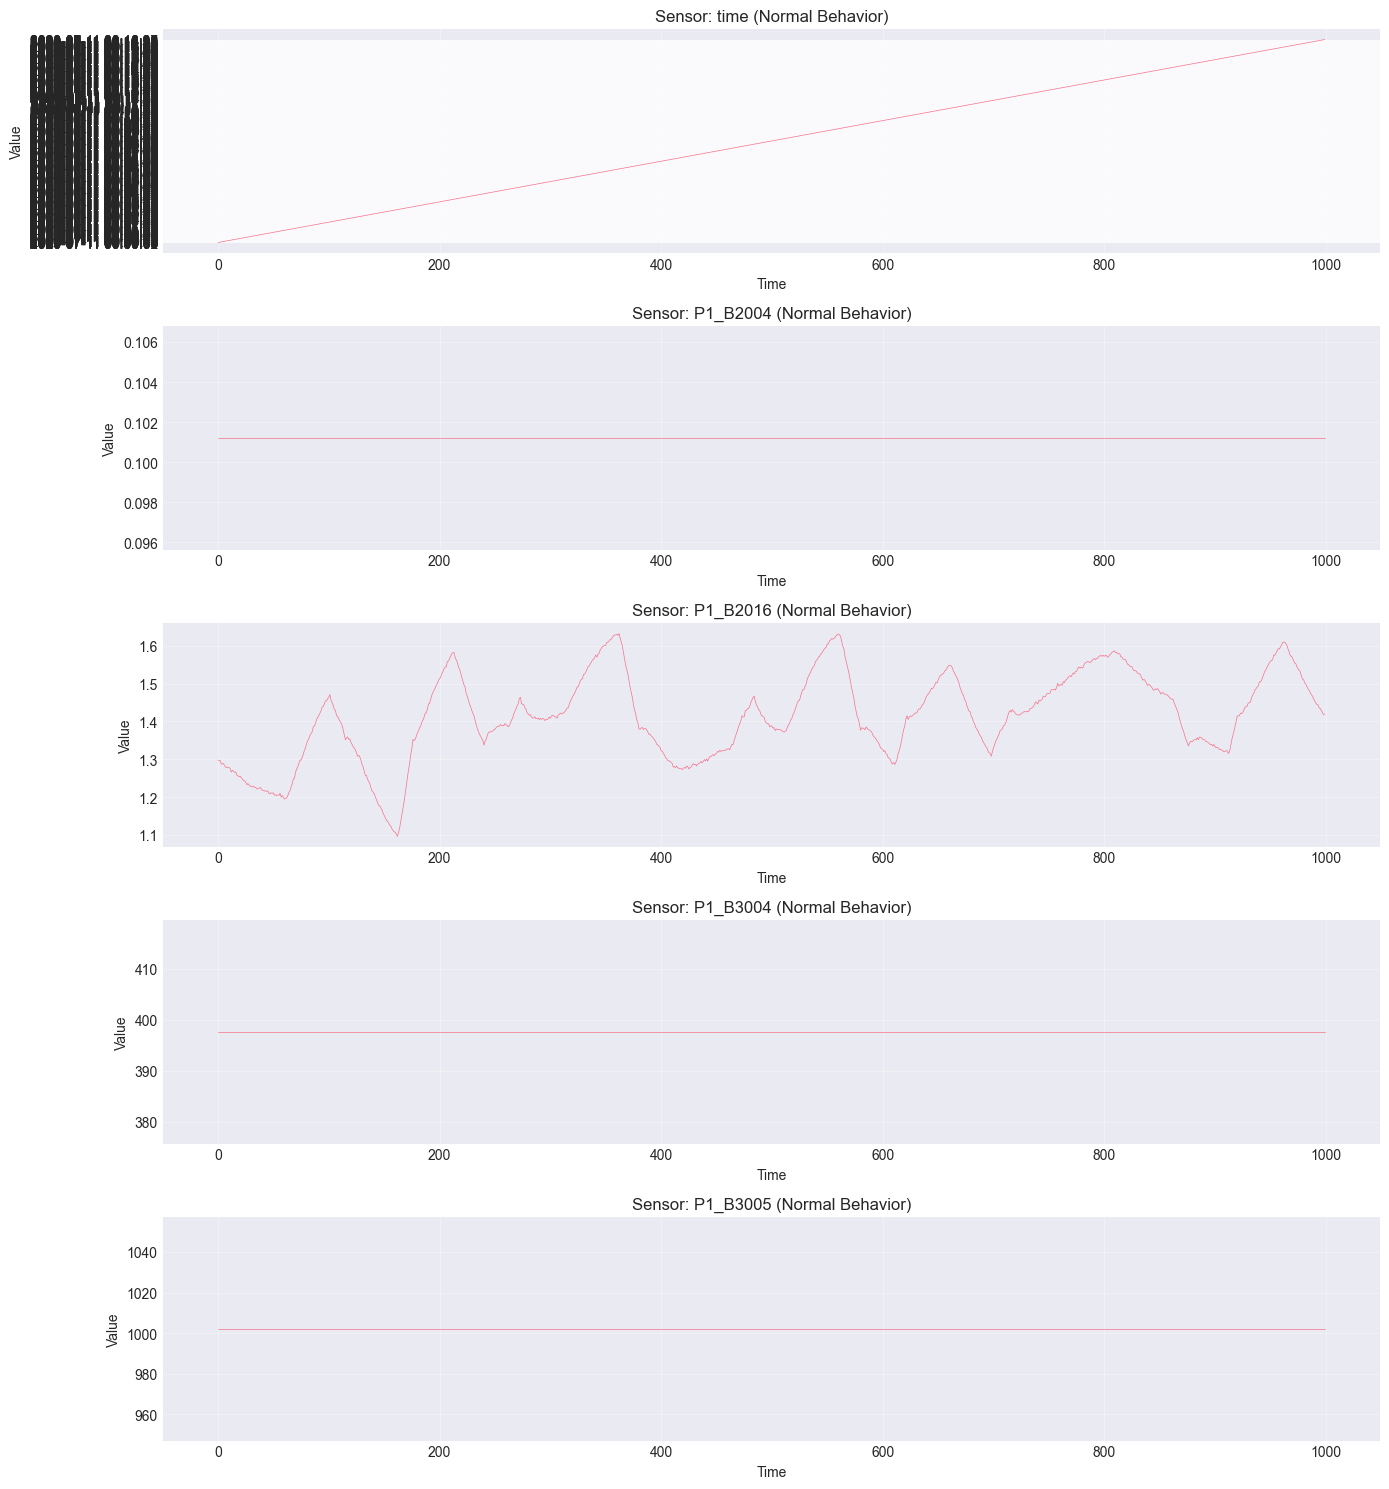

In [8]:
# Visualize a few sensors over time
sample_sensors = sensor_cols[:5]  # First 5 sensors

fig, axes = plt.subplots(len(sample_sensors), 1, figsize=(14, 3*len(sample_sensors)))

for idx, sensor in enumerate(sample_sensors):
    # Sample data for visualization
    sample_data = train_df[sensor].iloc[:1000]
    
    axes[idx].plot(sample_data, linewidth=0.5)
    axes[idx].set_title(f'Sensor: {sensor} (Normal Behavior)')
    axes[idx].set_xlabel('Time')
    axes[idx].set_ylabel('Value')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

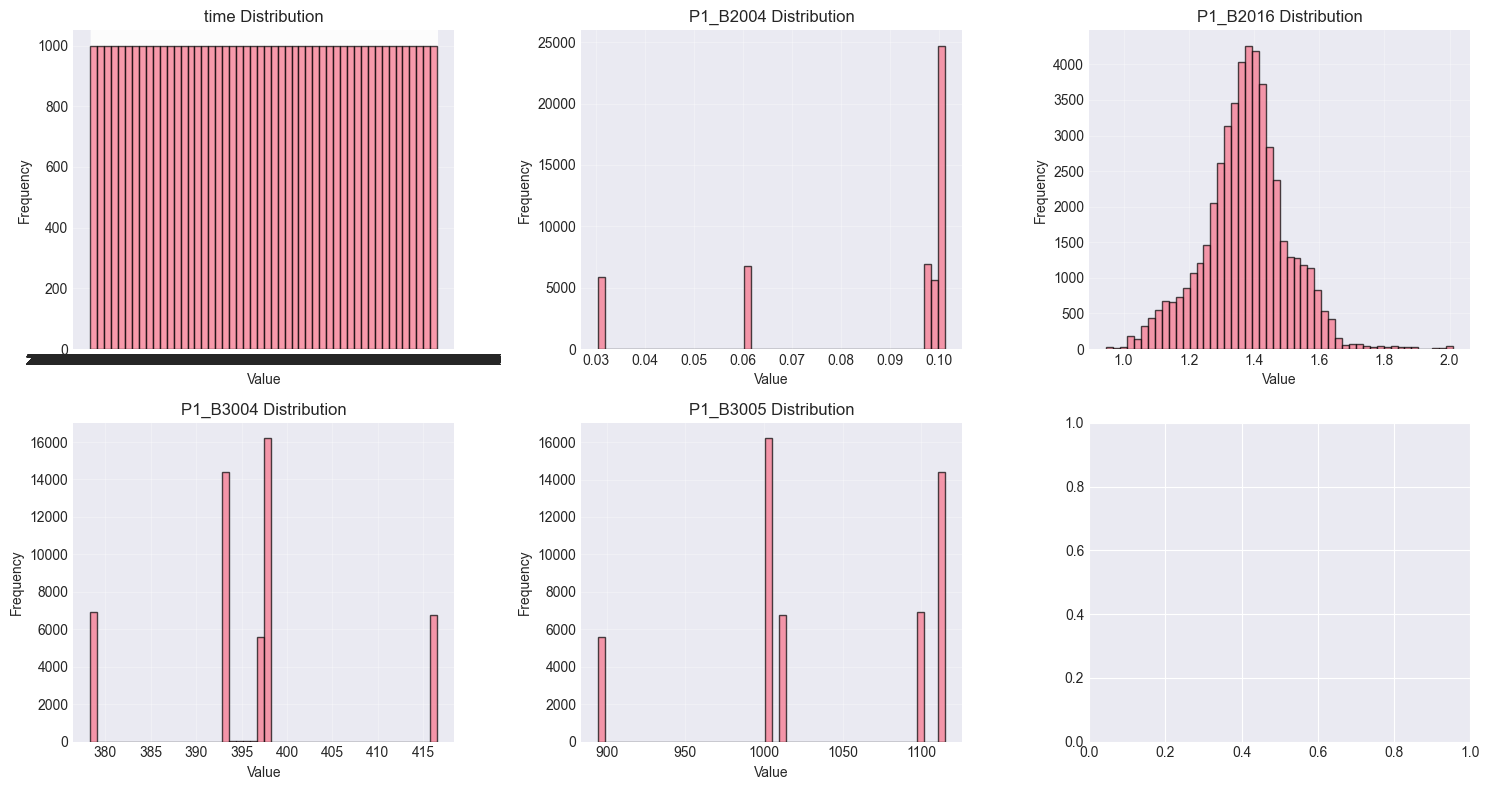

In [9]:
# Distribution of sensor values
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.ravel()

for idx, sensor in enumerate(sample_sensors[:6]):
    axes[idx].hist(train_df[sensor].dropna(), bins=50, alpha=0.7, edgecolor='black')
    axes[idx].set_title(f'{sensor} Distribution')
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Computing sensor correlations...


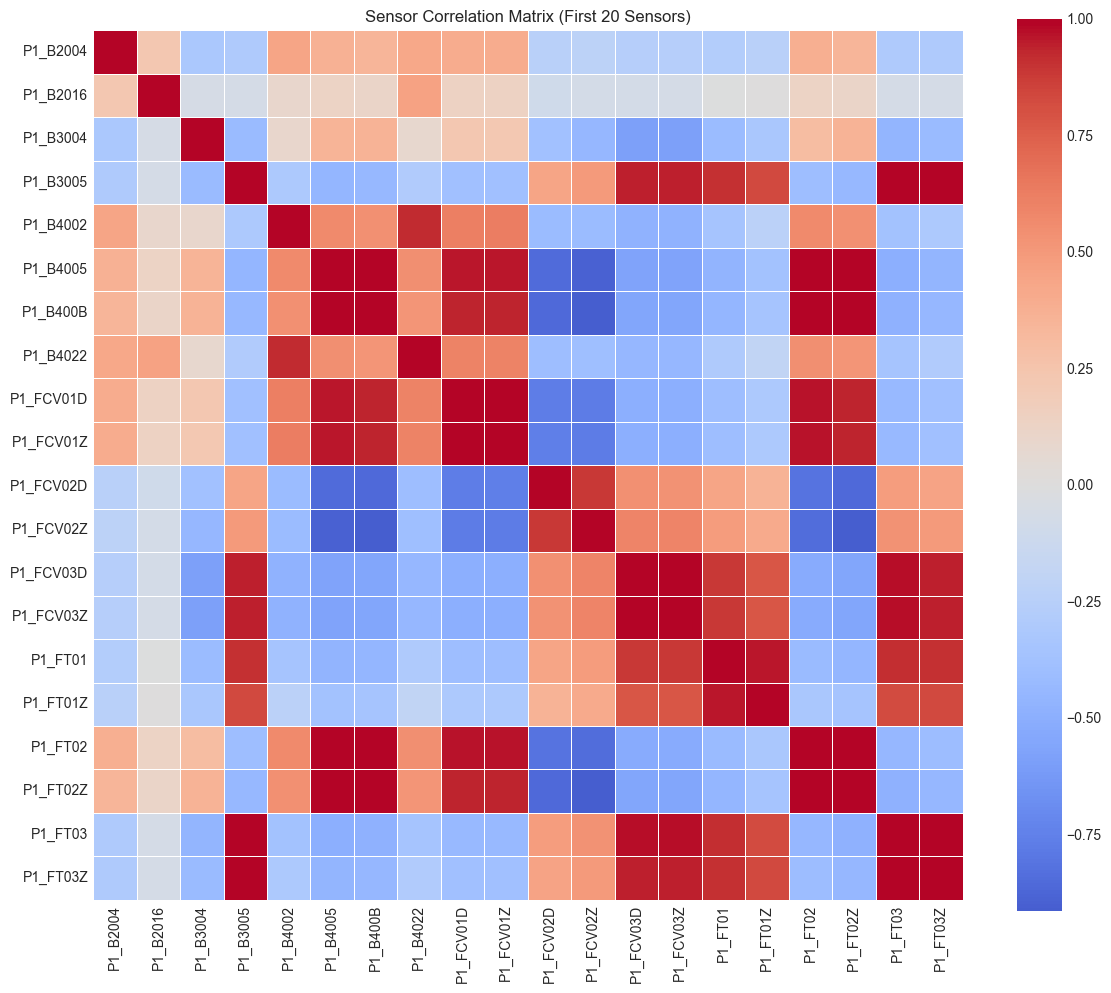


Highly correlated sensor pairs (|r| > 0.9):
  P1_B3005 <-> P1_FCV03D: 0.945
  P1_B3005 <-> P1_FCV03Z: 0.944
  P1_B3005 <-> P1_FT01: 0.904
  P1_B3005 <-> P1_FT03: 0.993
  P1_B3005 <-> P1_FT03Z: 0.997
  P1_B4002 <-> P1_B4022: 0.924
  P1_B4005 <-> P1_B400B: 0.993
  P1_B4005 <-> P1_FCV01D: 0.957
  P1_B4005 <-> P1_FCV01Z: 0.957
  P1_B4005 <-> P1_FT02: 0.987


In [11]:
# Correlation matrix of sensors
print("Computing sensor correlations...")

# Get only numeric sensor columns (exclude timestamp and attack)
numeric_sensors = train_df[sensor_cols].select_dtypes(include=[np.number]).columns.tolist()

# Use subset of sensors for visualization
correlation_sensors = numeric_sensors[:20]
corr_matrix = train_df[correlation_sensors].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Sensor Correlation Matrix (First 20 Sensors)')
plt.tight_layout()
plt.show()

# Find highly correlated sensors
high_corr = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.9:
            high_corr.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

if high_corr:
    print(f"\nHighly correlated sensor pairs (|r| > 0.9):")
    for s1, s2, corr in high_corr[:10]:
        print(f"  {s1} <-> {s2}: {corr:.3f}")

## 5. Normal vs Attack Comparison

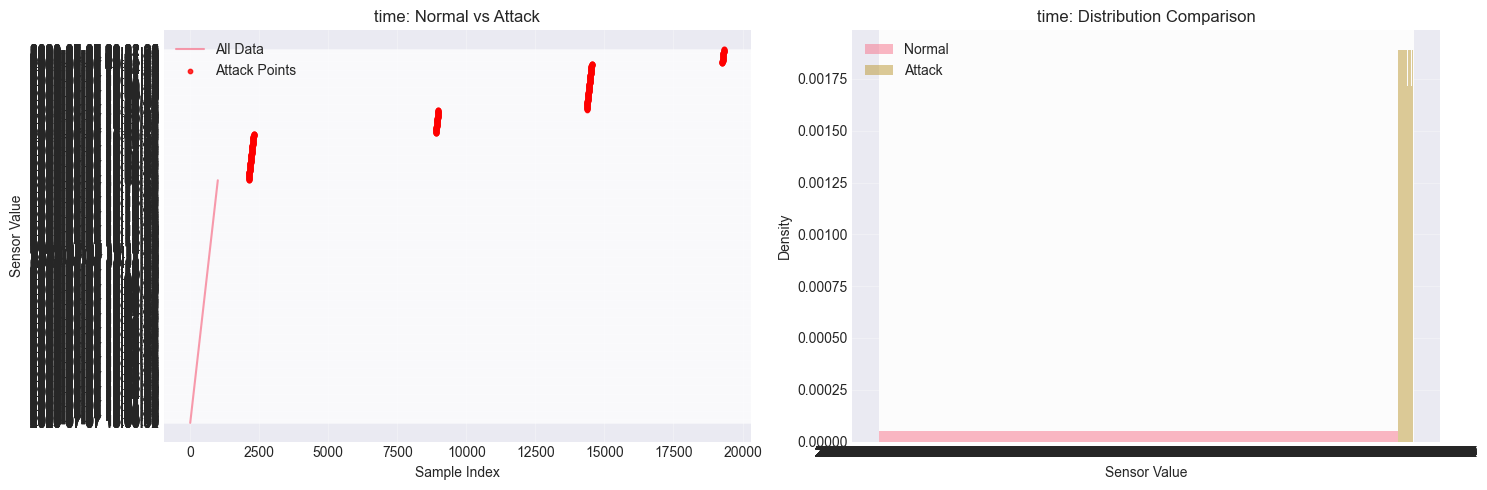

In [12]:
# Compare normal vs attack behavior for sample sensors
if 'attack' in test_df.columns:
    # Get normal and attack samples
    normal_mask = test_df['attack'] == 0
    attack_mask = test_df['attack'] != 0
    
    sample_sensor = sample_sensors[0]  # Use first sensor
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Time series comparison
    axes[0].plot(test_df[sample_sensor].iloc[:1000], label='All Data', alpha=0.7)
    axes[0].scatter(test_df[attack_mask].index[:1000], 
                   test_df[attack_mask][sample_sensor].iloc[:1000], 
                   c='red', s=10, label='Attack Points', alpha=0.8)
    axes[0].set_title(f'{sample_sensor}: Normal vs Attack')
    axes[0].set_xlabel('Sample Index')
    axes[0].set_ylabel('Sensor Value')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Distribution comparison
    axes[1].hist(test_df[normal_mask][sample_sensor].dropna(), 
                bins=50, alpha=0.5, label='Normal', density=True)
    axes[1].hist(test_df[attack_mask][sample_sensor].dropna(), 
                bins=50, alpha=0.5, label='Attack', density=True)
    axes[1].set_title(f'{sample_sensor}: Distribution Comparison')
    axes[1].set_xlabel('Sensor Value')
    axes[1].set_ylabel('Density')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

## 6. Baseline Detection Results

Baseline Detection Results:

          method  accuracy  precision   recall  f1_score      fpr      tpr  train_time  predict_time
          zscore   0.59370   0.056582 0.896296  0.106444 0.414697 0.896296    0.041535      0.017902
             iqr   0.50980   0.042473 0.796296  0.080645 0.498150 0.796296    0.156557      0.003885
isolation_forest   0.82775   0.105620 0.720370  0.184229 0.169270 0.720370    0.731219      0.157843


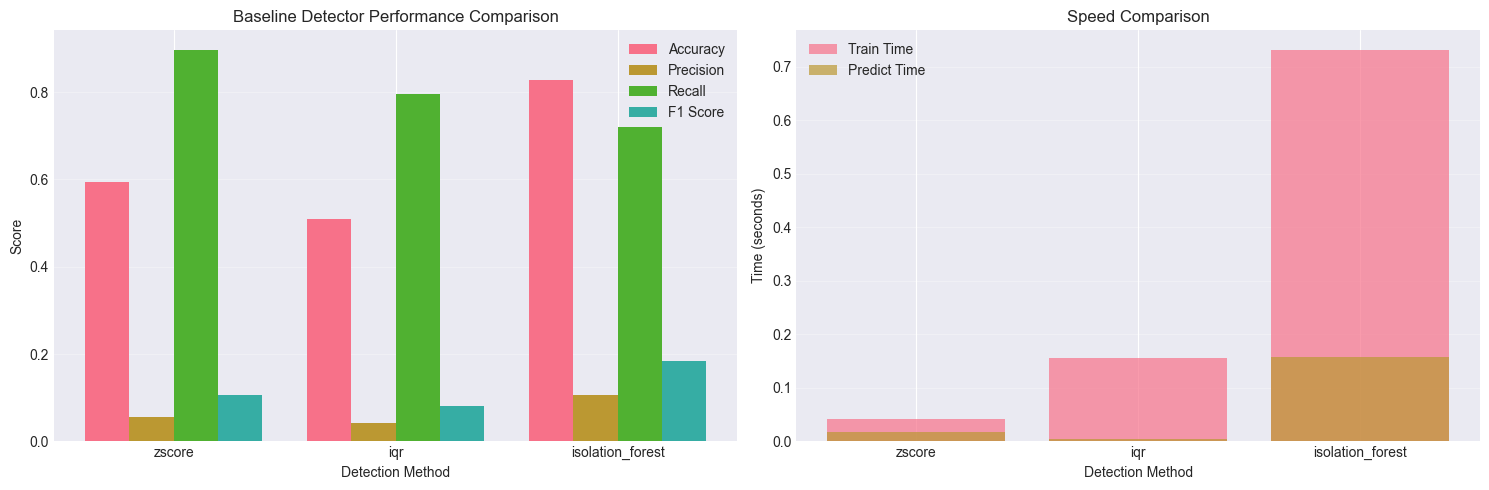

In [13]:
# Load saved baseline results
results_file = project_root / 'results' / 'metrics' / 'baseline_results_hai.csv'

if results_file.exists():
    results_df = pd.read_csv(results_file)
    print("Baseline Detection Results:\n")
    print(results_df.to_string(index=False))
    
    # Visualize results
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Performance metrics
    metrics = ['accuracy', 'precision', 'recall', 'f1_score']
    x = np.arange(len(results_df))
    width = 0.2
    
    for i, metric in enumerate(metrics):
        axes[0].bar(x + i*width, results_df[metric], width, label=metric.replace('_', ' ').title())
    
    axes[0].set_xlabel('Detection Method')
    axes[0].set_ylabel('Score')
    axes[0].set_title('Baseline Detector Performance Comparison')
    axes[0].set_xticks(x + width * 1.5)
    axes[0].set_xticklabels(results_df['method'])
    axes[0].legend()
    axes[0].grid(True, alpha=0.3, axis='y')
    
    # Speed comparison
    axes[1].bar(results_df['method'], results_df['train_time'], alpha=0.7, label='Train Time')
    axes[1].bar(results_df['method'], results_df['predict_time'], alpha=0.7, label='Predict Time')
    axes[1].set_xlabel('Detection Method')
    axes[1].set_ylabel('Time (seconds)')
    axes[1].set_title('Speed Comparison')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Baseline results not found. Run quick_test_baseline.py first.")

## 7. Key Findings & Insights

### Dataset Characteristics:
- **83 sensor features** across 4 industrial processes
- **Process P1** has the most sensors (38), indicating primary process control
- No missing values in the loaded samples
- Attack ratio in test data: ~2.7%

### Baseline Performance:
- **Isolation Forest** achieved best accuracy (82.77%)
- **Z-Score** achieved highest recall (89.63%) - catches most attacks
- All methods have low precision (high false positives)
- This is expected for simple baseline methods

### Next Steps:
1. **Feature Engineering** (Week 2)
   - Create statistical features (mean, std, rolling windows)
   - Extract temporal features
   - Use correlation insights

2. **ML Models** (Week 2)
   - Random Forest with engineered features
   - XGBoost for better performance
   - Target: >90% accuracy, <10% FPR

3. **Deep Learning** (Week 3)
   - LSTM for temporal patterns
   - Autoencoder for anomaly detection
   - Target: >93% accuracy, <5% FPR

## 8. Save Exploration Results

In [ ]:
# Save key insights
insights = {
    'dataset': 'HAI-21.03',
    'train_samples': len(train_df),
    'test_samples': len(test_df),
    'num_features': len(sensor_cols),
    'attack_ratio': test_info.get('attack_ratio', 0),
    'best_baseline_method': 'isolation_forest',
    'best_accuracy': 0.8277,
    'phase': 'Phase 3 - Baseline Testing',
    'date': '2025-11-06'
}

insights_df = pd.DataFrame([insights])
insights_file = project_root / 'results' / 'metrics' / 'phase3_insights.csv'
insights_df.to_csv(insights_file, index=False)

print(f"✅ Insights saved to: {insights_file}")
print("\n" + "="*70)
print(" 📊 PHASE 3: DATA EXPLORATION COMPLETED!")
print("="*70)
print("\nNext: Start Phase 4 - Feature Engineering")